In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
os.chdir('..')
os.chdir('..')

In [3]:
!pwd

/home/ayush/Ayush/Internship/Medical


In [4]:
df= pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
df.shape

(1190, 12)

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(918, 12)

In [9]:
X = df.iloc[:,:-1].values
Y= df.iloc[:,-1].values

In [10]:
X

array([[40. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       [49. ,  0. ,  3. , ...,  0. ,  1. ,  2. ],
       [37. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  1. ,  4. , ...,  1. ,  1.2,  2. ],
       [57. ,  0. ,  2. , ...,  0. ,  0. ,  2. ],
       [38. ,  1. ,  3. , ...,  0. ,  0. ,  1. ]])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=32)

In [12]:
X_train.shape

(734, 11)

In [13]:
knn = KNeighborsClassifier()
svc = SVC(kernel='linear',C=1, random_state=42)
dt=DecisionTreeClassifier(random_state=42)

### Cross validation scores without any feature engineering

In [14]:
sum=0
cv_knn_before=cross_val_score(knn, X_train, Y_train, cv=10)
for it in cv_knn_before:
    sum+=it
avg_knn_before =sum/10

In [15]:
sum=0
cv_svc_before=cross_val_score(svc, X_train, Y_train, cv=10)
for it in cv_svc_before:
    sum+=it
avg_svc_before =sum/10

In [16]:
sum=0
cv_dt_before=cross_val_score(dt, X_train, Y_train, cv=10)
for it in cv_dt_before:
    sum+=it
avg_svc_before =sum/10

In [17]:
df= pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')

In [18]:
df=df.drop_duplicates()

In [19]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [20]:
# Replacing all the rows that have 0 value in the resting bp column
df['resting bp s']= df['resting bp s'].replace(0, np.nan)
df['cholesterol']= df['cholesterol'].replace(0, np.nan)

In [21]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,917.000000,746.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.540894,244.635389,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,17.999749,59.153524,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,207.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,237.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [22]:
# There is only one row with 0 value in the required column
df.isna().sum()

age                      0
sex                      0
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar      0
resting ecg              0
max heart rate           0
exercise angina          0
oldpeak                  0
ST slope                 0
target                   0
dtype: int64

### Applying the Iterative Imputer to handle the NaN Values

In [23]:
iti = IterativeImputer()
df=iti.fit_transform(df)

In [24]:
X=df[:,:-1]
Y=df[:,-1]

In [25]:
X.shape

(918, 11)

In [26]:
Y.shape

(918,)

In [27]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=32)

In [28]:
X_train.shape

(734, 11)

In [29]:
knn = KNeighborsClassifier()
svc = SVC(kernel='linear',C=1, random_state=42)
dt=DecisionTreeClassifier(random_state=42)

### Cross Validation Scores after Iterative Imputation

In [30]:
cv_knn_after=cross_val_score(knn, X_train, Y_train, cv=10)
for it in cv_knn_after:
    sum+=it
avg_knn_after =sum/10

In [31]:
cv_svc_after=cross_val_score(svc, X_train, Y_train, cv=10)
for it in cv_svc_after:
    sum+=it
avg_svc_after =sum/10

In [32]:
cv_dt_after=cross_val_score(dt, X_train, Y_train, cv=10)
for it in cv_dt_after:
    sum+=it
avg_dt_after =sum/10

In [33]:
def plot(cv_before, cv_after, label1, label2):
    x = np.array([1, 2, 3, 4, 5,6,7,8,9,10])

    plt.figure(figsize=(10, 6))

    sns.lineplot(x=x, y=cv_before, label=label1, marker='o')
    sns.lineplot(x=x, y=cv_after, label=label2, marker='s')

    plt.title('Comparison of Cross Validation before and after')
    plt.xlabel('Count')
    plt.ylabel('Cross-Validation Score')
    plt.legend()
    plt.show()

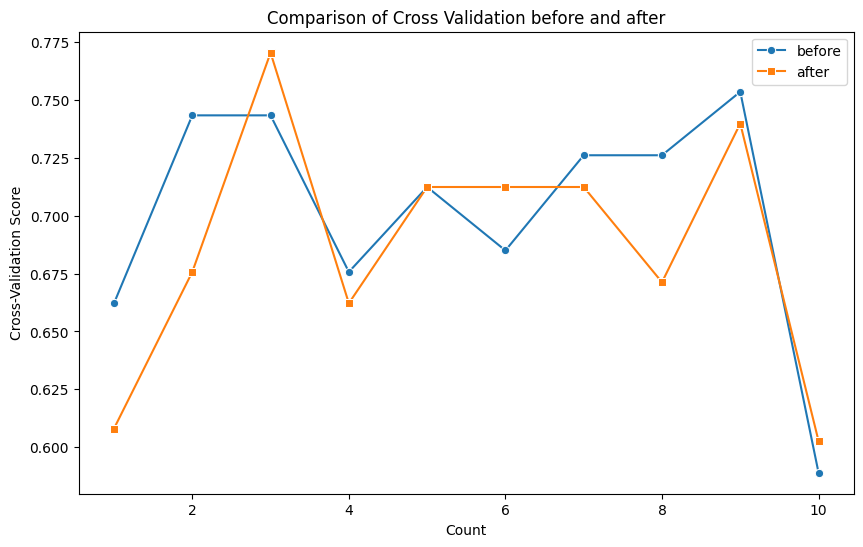

In [37]:
plot(cv_knn_before, cv_knn_after, "before", "after")

In [ ]:
plot(cv_svc_before, cv_svc_after, "before", "after")

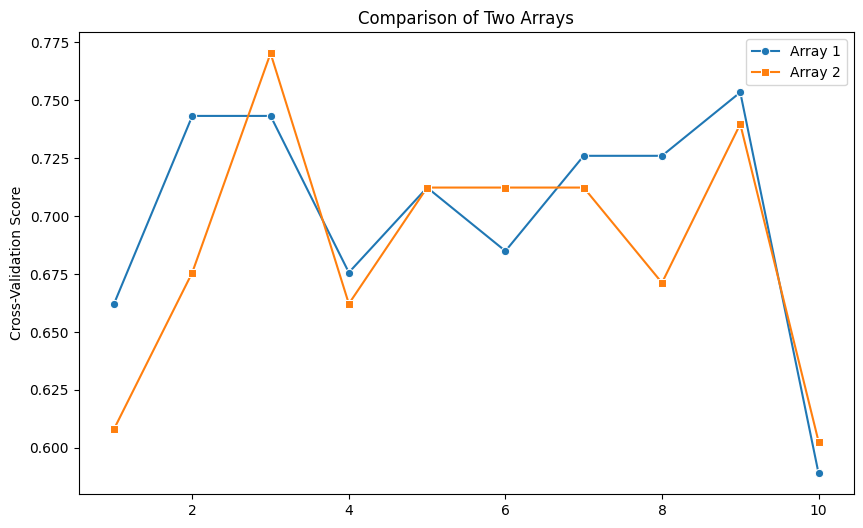

In [34]:
x = np.array([1, 2, 3, 4, 5,6,7,8,9,10])

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data using Seaborn
sns.lineplot(x=x, y=cv_knn_before, label='Array 1', marker='o')
sns.lineplot(x=x, y=cv_knn_after, label='Array 2', marker='s')

# Add title and labels
plt.title('Comparison of Two Arrays')
plt.xlabel('')
plt.ylabel('Cross-Validation Score')

# Show the plot
plt.legend()
plt.show()


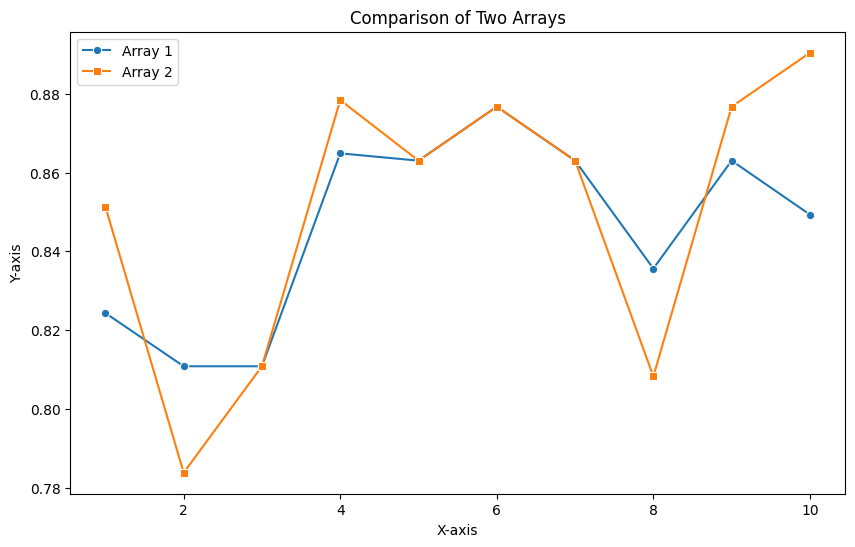

In [35]:
x = np.array([1, 2, 3, 4, 5,6,7,8,9,10])

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data using Seaborn
sns.lineplot(x=x, y=cv_svc_before, label='Array 1', marker='o')
sns.lineplot(x=x, y=cv_svc_after, label='Array 2', marker='s')

# Add title and labels
plt.title('Comparison of Two Arrays')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.legend()
plt.show()


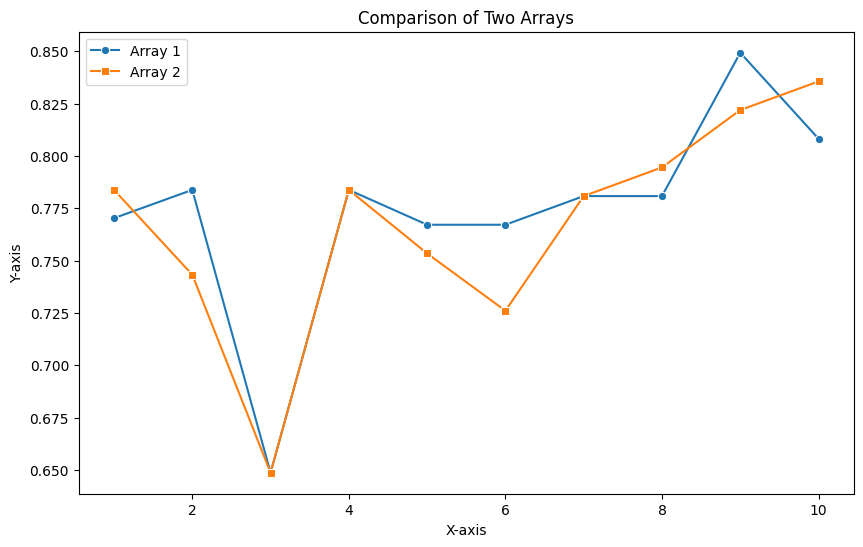

In [36]:
x = np.array([1, 2, 3, 4, 5,6,7,8,9,10])

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data using Seaborn
sns.lineplot(x=x, y=cv_dt_before, label='Array 1', marker='o')
sns.lineplot(x=x, y=cv_dt_after, label='Array 2', marker='s')

# Add title and labels
plt.title('Comparison of Two Arrays')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.legend()
plt.show()
